In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [3]:
bs = 64

In [4]:
data = ImageDataBunch.from_folder(path='data', size=244, ds_tfms=get_transforms(), bs=bs, no_check=True).normalize(imagenet_stats)

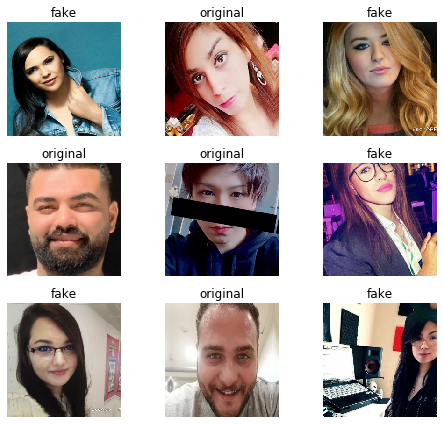

In [5]:
data.show_batch(rows=3, figsize=(7, 6))

In [6]:
data.classes

['fake', 'original']

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.168882,2.272971,0.433962,00:13
1,0.998971,1.404004,0.311321,00:11
2,0.832915,1.390599,0.349057,00:10
3,0.749832,1.384942,0.405660,00:11


In [9]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

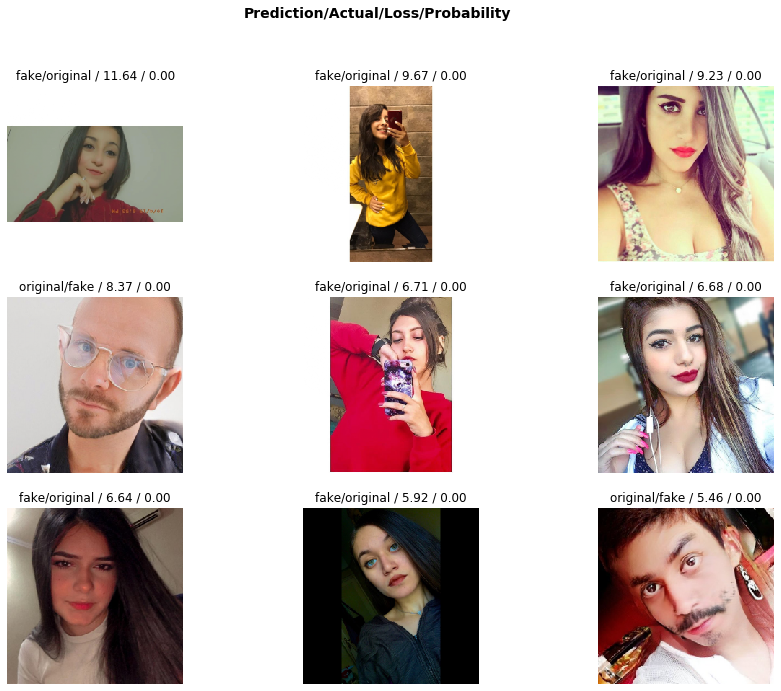

In [10]:
interp.plot_top_losses(9, figsize=(15,11))

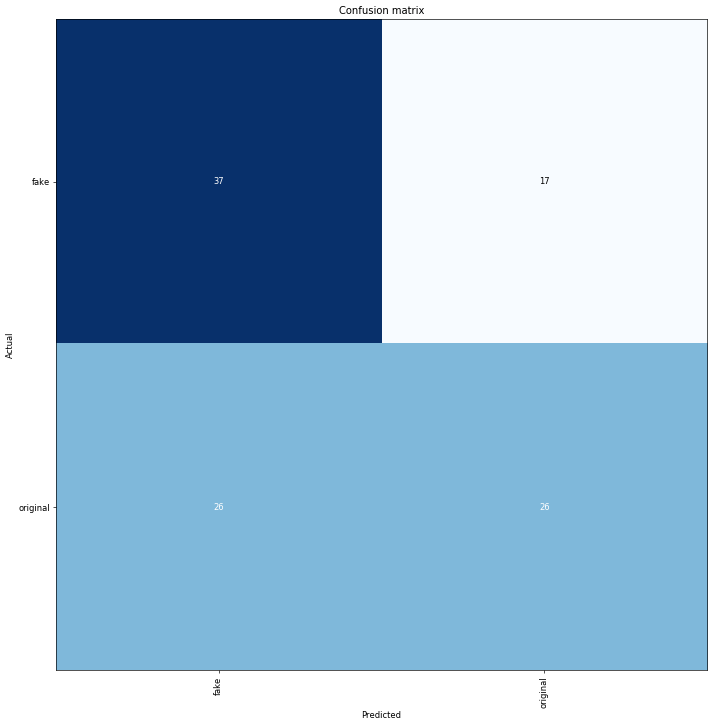

In [11]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [12]:
interp.most_confused(min_val=2)

[('original', 'fake', 26), ('fake', 'original', 17)]

In [13]:
learn.unfreeze()

In [14]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.772387,1.393510,0.283019,00:12


In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.535953,1.111392,0.235849,00:12
1,0.502605,1.579563,0.320755,00:12
2,0.442380,1.200249,0.283019,00:12
3,0.359315,1.008229,0.264151,00:11


In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


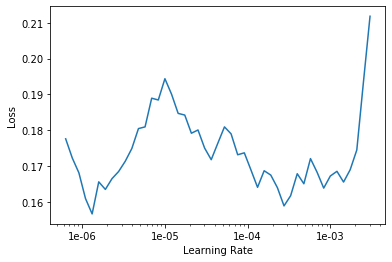

In [17]:
learn.recorder.plot()

In [18]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.192477,1.060408,0.264151,00:12
1,0.156063,1.069060,0.254717,00:13


In [19]:
learn.fit_one_cycle(2, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.159205,1.299463,0.254717,00:12
1,0.135188,1.248220,0.264151,00:12


In [20]:
learn.fit_one_cycle(5, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.121597,1.209166,0.245283,00:12
1,0.110318,1.229171,0.198113,00:12
2,0.115271,1.317124,0.235849,00:12
3,0.102692,1.274058,0.235849,00:12
4,0.086630,1.223804,0.235849,00:12


In [21]:
learn.save('stage-34')